In [97]:
import pandas as pd
import numpy as np
import seaborn as sns
import statistics as stats
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [98]:
 df=pd.read_csv('/content/drive/MyDrive/Kaggle Competition/test.csv')

In [100]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [101]:
df.shape

(1459, 80)

In [102]:
numcol=[]
numcol=list(df1.select_dtypes(exclude=['object']))

In [103]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [104]:
null=pd.DataFrame(df.isnull().sum())
null.head(81)

,0
Id,0
MSSubClass,0
MSZoning,4
LotFrontage,227
LotArea,0
...,...
MiscVal,0
MoSold,0
YrSold,0
SaleType,1


In [105]:
#Columns with >=30%  missing values
dim=df.shape
thirtyper=dim[0]/3
delcolumns=[]
for i in df.columns:
  if(df[i].isnull().sum()>=thirtyper):
    delcolumns.append(i)

In [106]:
delcolumns

['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature']

In [107]:
df.drop('MiscFeature',axis=1,inplace=True)

In [108]:
df.drop('Id',axis=1,inplace=True)

In [109]:
#Filling the missing values 

df['BsmtQual'].fillna(value='NoB',inplace=True)
df['BsmtCond'].fillna(value='NoB',inplace=True)
df['BsmtExposure'].fillna(value='NoB',inplace=True)
df['BsmtFinType1'].fillna(value='NoB',inplace=True)
df['BsmtFinType2'].fillna(value='NoB',inplace=True)
df['GarageType'].fillna(value='NoG',inplace=True)
df['GarageYrBlt'].fillna(value='NoG',inplace=True)
df['GarageFinish'].fillna(value='NoG',inplace=True)
df['GarageQual'].fillna(value='NoG',inplace=True)
df['GarageCond'].fillna(value='NoG',inplace=True)
df['PoolQC'].fillna(value='NoP',inplace=True)
df['Fence'].fillna(value='NoF',inplace=True)
df['Alley'].fillna(value='NoA',inplace=True)
df['FireplaceQu'].fillna(value='NoFI',inplace=True)
df['LotFrontage'].fillna(value=stats.median('LotFrontage'),inplace=True)
df['MasVnrArea'].fillna(value=199,inplace=True)     #199 is a median 
df['Utilities'].fillna(stats.mode('Utilities'),inplace=True)
df['Exterior2nd'].fillna(stats.mode('Exterior2nd'),inplace=True)
df['Exterior1st'].fillna('BrkComm',inplace=True)
df['SaleType'].fillna(stats.mode('SaleType'),inplace=True)
df['Functional'].fillna(stats.mode(df['Functional']),inplace=True)
df['GarageArea'].fillna(stats.median(df['GarageArea']),inplace=True)
df['TotalBsmtSF'].fillna(stats.median(df['TotalBsmtSF']),inplace=True)
df['BsmtUnfSF'].fillna(stats.median('BsmtUnfSF'),inplace=True)
df['BsmtFinSF1'].fillna(value=492.,inplace=True)
df['BsmtFinType1'].fillna(stats.mode('BsmtFintype1'),inplace=True)
df['BsmtFinType2'].fillna(stats.mode('BsmtFintype2'),inplace=True)
df['BsmtFullBath'].fillna(value=1,inplace=True)
df['BsmtHalfBath'].fillna(value=0,inplace=True)
df['KitchenQual'].fillna(value='TA',inplace=True)
df['GarageCars'].fillna(value=1,inplace=True)
df['MSZoning'].fillna(stats.mode('MSZoning'),inplace=True)
df['MasVnrType'].fillna(value='BrkFace',inplace=True)
df['BsmtFinSF2'].fillna(value=352.,inplace=True)

In [117]:
null=pd.DataFrame(df.isnull().sum())
null.head(81)

,0
MSSubClass,0
MSZoning,0
LotFrontage,0
LotArea,0
Street,0
...,...
MiscVal,0
MoSold,0
YrSold,0
SaleType,0


In [118]:
str=df.select_dtypes('object').columns
for i in str:
  print(i)
  print(df[i].unique())

MSZoning
['RH' 'RL' 'RM' 'FV' 'C (all)' 'n']
LotFrontage
[80.0 81.0 74.0 78.0 43.0 75.0 'n' 63.0 85.0 70.0 26.0 21.0 24.0 102.0
 94.0 90.0 79.0 110.0 105.0 41.0 100.0 67.0 60.0 73.0 92.0 84.0 39.0 88.0
 25.0 30.0 57.0 68.0 98.0 120.0 87.0 119.0 65.0 56.0 69.0 50.0 53.0 52.0
 51.0 72.0 86.0 124.0 44.0 83.0 64.0 82.0 38.0 89.0 35.0 58.0 66.0 93.0
 31.0 76.0 28.0 61.0 95.0 129.0 59.0 77.0 96.0 47.0 34.0 117.0 48.0 62.0
 42.0 106.0 112.0 32.0 115.0 71.0 45.0 109.0 113.0 125.0 101.0 104.0 108.0
 130.0 135.0 36.0 55.0 136.0 97.0 91.0 37.0 22.0 103.0 99.0 40.0 123.0
 54.0 107.0 150.0 160.0 195.0 128.0 33.0 118.0 134.0 155.0 126.0 46.0
 149.0 200.0 121.0 131.0 114.0 49.0 133.0 140.0]
Street
['Pave' 'Grvl']
Alley
['NoA' 'Pave' 'Grvl']
LotShape
['Reg' 'IR1' 'IR2' 'IR3']
LandContour
['Lvl' 'HLS' 'Bnk' 'Low']
Utilities
['AllPub' 'i']
LotConfig
['Inside' 'Corner' 'FR2' 'CulDSac' 'FR3']
LandSlope
['Gtl' 'Mod' 'Sev']
Neighborhood
['NAmes' 'Gilbert' 'StoneBr' 'BrDale' 'NPkVill' 'NridgHt' 'Blmngtn'
 'N

In [119]:
# Ordinal encoding

maps1={'GLQ': 7, 'ALQ': 6, 'Unf': 2, 'Rec': 4, 'BLQ': 5, 'NoB': 1, 'LwQ': 3}
df['BsmtFinType1']=df['BsmtFinType1'].map(maps1)
maps2={'GLQ': 7, 'ALQ': 6, 'Unf': 2, 'Rec': 4, 'BLQ': 5, 'NoB': 1, 'LwQ': 3}
df['BsmtFinType2']=df['BsmtFinType2'].map(maps2)
maps3={'Reg': 4, 'IR1': 3, 'IR2': 2, 'IR3': 1}
df['LotShape']=df['LotShape'].map(maps3)
maps4={'Gd': 5, 'TA': 4, 'Ex': 6, 'Fa': 3,'Po':2,'NoB':1}
df['BsmtQual']=df['BsmtQual'].map(maps4)
df['BsmtCond']=df['BsmtCond'].map(maps4)
maps5={'No': 2, 'Gd': 5, 'Mn': 3, 'Av': 4, 'NoB': 1}
df['BsmtExposure']=df['BsmtExposure'].map(maps5)
maps6={'TA': 3, 'Gd': 4, 'Fa': 2, 'Po': 1, 'Ex': 5}
df['ExterQual']=df['ExterQual'].map(maps6)
df['ExterCond']=df['ExterCond'].map(maps6)
df['HeatingQC']=df['HeatingQC'].map(maps6)
df['KitchenQual']=df['KitchenQual'].map(maps6)
maps7={'Typ': 7, 'Min1': 6, 'Maj1': 3, 'Min2': 5, 'Mod': 4, 'Maj2': 2, 'Sev': 1}
df['Functional']=df['Functional'].map(maps7)
maps8={'Gd': 5, 'TA': 4, 'Ex': 6, 'Fa': 3,'Po':2,'NoFI':1}
df['FireplaceQu']=df['FireplaceQu'].map(maps8)
maps9={'Attchd': 6, 'Detchd': 2, 'BuiltIn': 4, 'CarPort': 3, 'NoG': 1, 'Basment': 5, '2Types': 7}
df['GarageType']=df['GarageType'].map(maps9)
maps10={'RFn': 3, 'Unf': 2, 'Fin': 4, 'NoG': 1}
df['GarageFinish']=df['GarageFinish'].map(maps10)
maps11={'Gd': 5, 'TA': 4, 'Ex': 6, 'Fa': 3,'Po':2,'NoG':1}
df['GarageQual']=df['GarageQual'].map(maps11)
df['GarageCond']=df['GarageCond'].map(maps11)
maps12={'Y': 3, 'N': 1, 'P': 2}
df['PavedDrive']=df['PavedDrive'].map(maps12)
maps13={'Gd': 5, 'TA': 4, 'Ex': 6, 'Fa': 3,'Po':2,'NoP':1}
df['PoolQC']=df['PoolQC'].map(maps13)
maps14={'NoF':1 ,'MnPrv':4 ,'GdWo':3 ,'GdPrv':5, 'MnWw':2}
df['Fence']=df['Fence'].map(maps14)
maps15={'WD': 9, 'New': 7, 'COD': 6, 'ConLD': 2, 'ConLI': 3, 'CWD': 8, 'ConLw': 4, 'Con': 5, 'Oth': 1}
df['SaleType']=df['SaleType'].map(maps15)
maps16={'Normal': 6, 'Abnorml': 5, 'Partial': 1, 'AdjLand': 4, 'Alloca': 3, 'Family':2}
df['SaleCondition']=df['SaleCondition'].map(maps16)
maps17={'NoA':1,'Grvl': 3 ,'Pave': 2}
df['Alley']=df['Alley'].map(maps17)
maps18={'Grvl': 3 ,'Pave': 2}
df['Street']=df['Street'].map(maps18)
maps19={'Gtl': 3, 'Mod': 2, 'Sev': 1}
df['LandSlope']=df['LandSlope'].map(maps19)


In [120]:
df['GarageYrBlt'].replace('NoG',0,inplace=True)
df['LotFrontage'].replace('n',0,inplace=True)
df['GarageYrBlt'].replace('e',0,inplace=True)
df['BsmtUnfSF'].replace('f',0,inplace=True)

In [121]:
# Typecasting the feature to float

df['GarageYrBlt'].apply(lambda x: float(x))
df['LotFrontage'].apply(lambda x: float(x))
df['BsmtUnfSF'].apply(lambda x: float(x))

0        270.0
1        406.0
2        137.0
3        324.0
4       1017.0
         ...  
1454     546.0
1455     294.0
1456       0.0
1457     575.0
1458     238.0
Name: BsmtUnfSF, Length: 1459, dtype: float64

In [122]:
labcol=list(df.select_dtypes('object').columns)
labcol

['MSZoning',
 'LandContour',
 'Utilities',
 'LotConfig',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'Foundation',
 'Heating',
 'CentralAir',
 'Electrical']

In [123]:
# Label encoding
from sklearn.preprocessing import LabelEncoder
def lab(labcol):
  for i in labcol:
    df[i]=LabelEncoder().fit_transform(df[i])
lab(labcol)


In [124]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,2,80.0,11622,2,1,4,3,0,4,...,0,120,0,1,4,0,6,2010,9.0,6
1,20,3,81.0,14267,2,1,3,3,0,0,...,0,0,0,1,1,12500,6,2010,9.0,6
2,60,3,74.0,13830,2,1,3,3,0,4,...,0,0,0,1,4,0,3,2010,9.0,6
3,60,3,78.0,9978,2,1,3,3,0,4,...,0,0,0,1,1,0,6,2010,9.0,6
4,120,3,43.0,5005,2,1,3,1,0,4,...,0,144,0,1,1,0,1,2010,9.0,6


In [125]:
str=df.select_dtypes('object').columns
str

Index([], dtype='object')

In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 78 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1459 non-null   int64  
 1   MSZoning       1459 non-null   int64  
 2   LotFrontage    1459 non-null   float64
 3   LotArea        1459 non-null   int64  
 4   Street         1459 non-null   int64  
 5   Alley          1459 non-null   int64  
 6   LotShape       1459 non-null   int64  
 7   LandContour    1459 non-null   int64  
 8   Utilities      1459 non-null   int64  
 9   LotConfig      1459 non-null   int64  
 10  LandSlope      1459 non-null   int64  
 11  Neighborhood   1459 non-null   int64  
 12  Condition1     1459 non-null   int64  
 13  Condition2     1459 non-null   int64  
 14  BldgType       1459 non-null   int64  
 15  HouseStyle     1459 non-null   int64  
 16  OverallQual    1459 non-null   int64  
 17  OverallCond    1459 non-null   int64  
 18  YearBuil

In [127]:
df.shape

(1459, 78)

In [128]:
df.drop(['GarageCond','GarageYrBlt','PoolQC'],axis=1,inplace=True)

In [74]:
from sklearn.feature_selection import VarianceThreshold
vt=VarianceThreshold(threshold=0)
vt.fit(df)

VarianceThreshold(threshold=0)

In [75]:
vt.get_support(indices=False)

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

In [76]:
df.columns[vt.get_support(indices=False)]

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'PavedDrive', 'WoodDeckSF',
       'OpenPorchSF', 'En

In [129]:
zero_var_col=[i for i in df.columns if i not in df.columns[vt.get_support(indices=False)]]
zero_var_col=['BsmtFinSF2',
 'LowQualFinSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal']

In [130]:
df.drop(zero_var_col,axis=1,inplace=True)

In [ ]:
# feature importance
X=df.drop('SalePrice',axis=1)
y=df['SalePrice']
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.2,random_state=0)
from sklearn.feature_selection import chi2
fscore,p_values=chi2(X_train,Y_train)
print(fscore)
print(p_values)

In [ ]:
p_values_series=pd.Series(p_values)
p_values_series.index=X_train.columns
pd.DataFrame(p_values_series)

,0
MSSubClass,0.000000
MSZoning,1.000000
LotFrontage,0.000000
LotArea,0.000000
Street,1.000000
...,...
MiscVal,0.000000
MoSold,0.019631
YrSold,1.000000
SaleType,1.000000


In [131]:
df.shape

(1459, 69)

In [132]:
log=['1stFlrSF','GrLivArea','BsmtUnfSF','TotalBsmtSF','2ndFlrSF','LotArea','LotFrontage','GarageArea','MasVnrArea','BsmtFinSF1','BedroomAbvGr','Fireplaces','GarageCars','WoodDeckSF','OpenPorchSF']

In [133]:
# log transformation
for i in log:
  df[i]=np.log(df[i])


In [134]:
temp=[]
for i in log:
  temp.append(list(df[i].unique()))

In [135]:
for i in range(len(log)):
  if -np.inf in temp[i]:
    temp[i].remove(-np.inf)

In [ ]:
temp

[[6.55250788703459,
  6.519147287940395,
  6.79346613258001,
  6.516193076042964,
  6.222576268071369,
  6.340359303727752,
  6.398594934535208,
  6.561030665896573,
  6.333279628139691,
  6.4457198193855785,
  6.786716950605081,
  6.721425700790643,
  6.71901315438526,
  7.001245622069476,
  6.71295620067707,
  6.733401891837359,
  6.396929655216146,
  6.455198563340122,
  6.628041376179533,
  6.309918278226516,
  6.771935555839602,
  7.102499355774649,
  6.403574197934815,
  6.5722825426940075,
  6.467698726104354,
  6.2766434893416445,
  6.285998094508865,
  6.22455842927536,
  6.0112671744041615,
  6.532334292222349,
  6.049733455231958,
  6.406879986069314,
  5.220355825078324,
  7.01301578963963,
  7.028201432058005,
  6.400257445308821,
  6.366470447731438,
  6.811244378601294,
  6.261491684321042,
  5.8522024797744745,
  6.210600077024653,
  6.198478716492308,
  6.410174881966167,
  6.97914527506881,
  6.659293919683638,
  6.495265555937008,
  6.212606095751519,
  5.19295685089

In [136]:
k=0
for i in log:
  for j in range(len(df[i])):
    if (df[i][j]==-np.inf or df[i][j]==np.inf):
      df[i][j]=min(temp[k])
  k=k+1

In [94]:
pd.DataFrame(df.isnull().sum())

,0
MSSubClass,0
MSZoning,0
LotFrontage,0
LotArea,0
Street,0
...,...
Fence,0
MoSold,0
YrSold,0
SaleType,0


2ndFlrSF
LotArea
LotFrontage
GarageArea
MasVnrArea
SalePrice
BsmtFinSF1
GrLivArea
BedroomAbvGr
Fireplaces
GarageCars
WoodDeckSF
OpenPorchSF


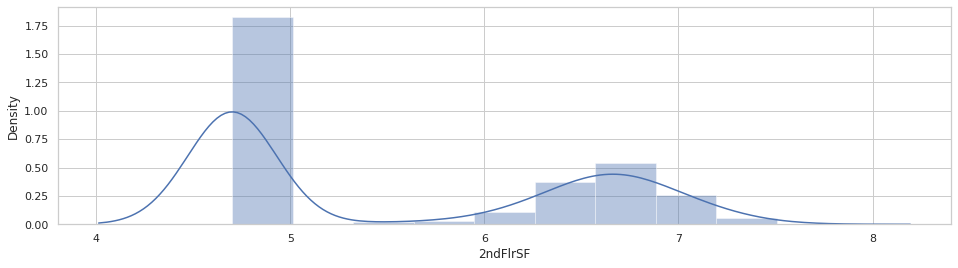

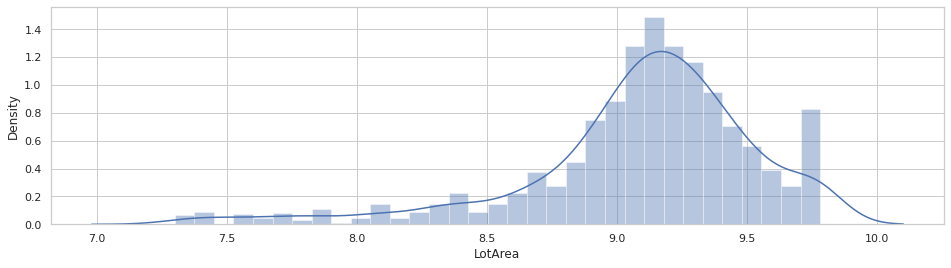

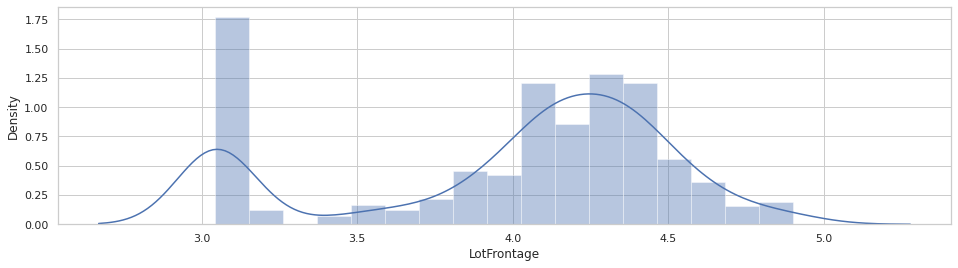

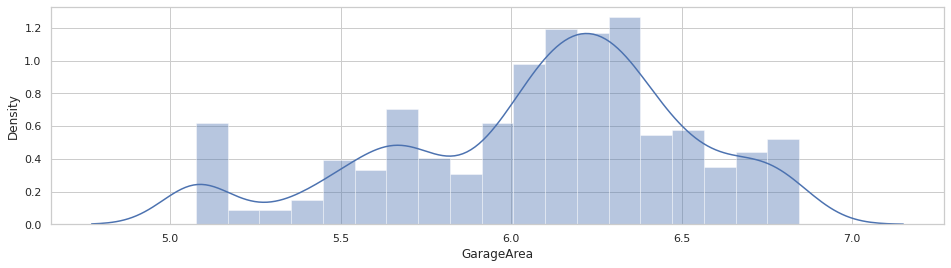

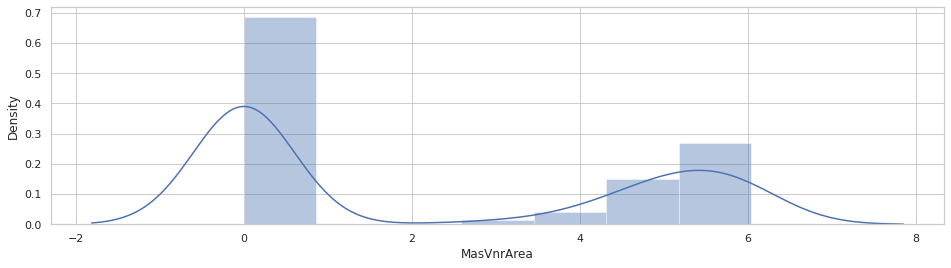

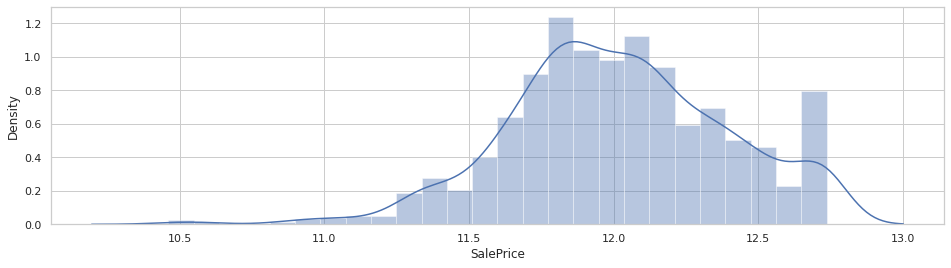

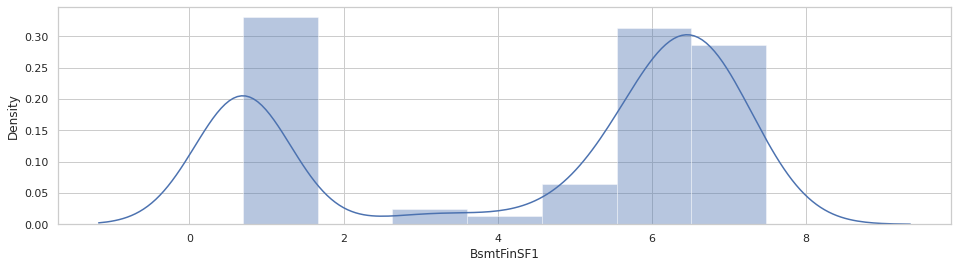

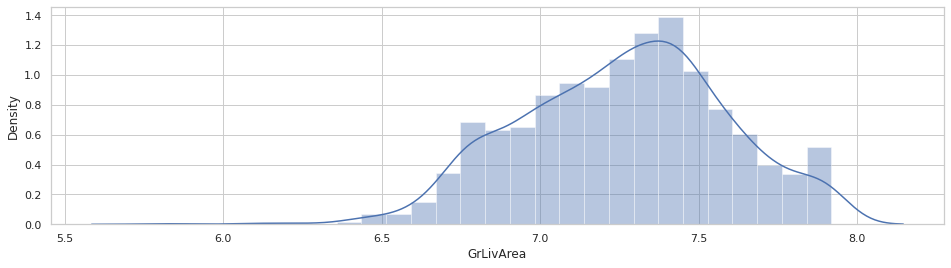

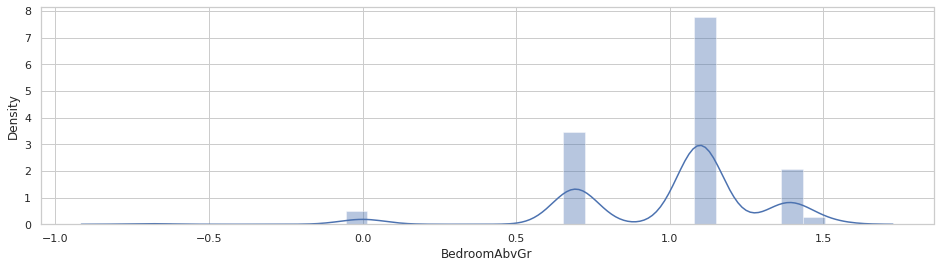

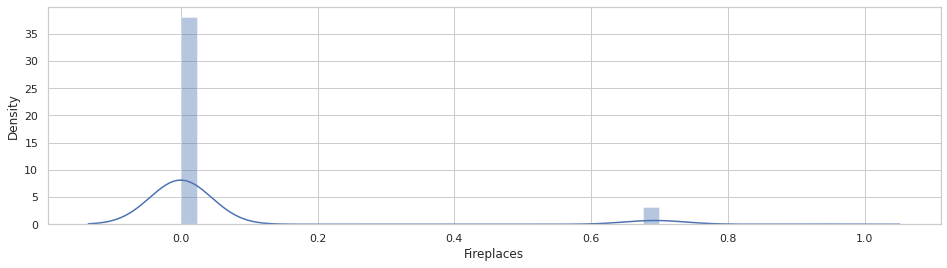

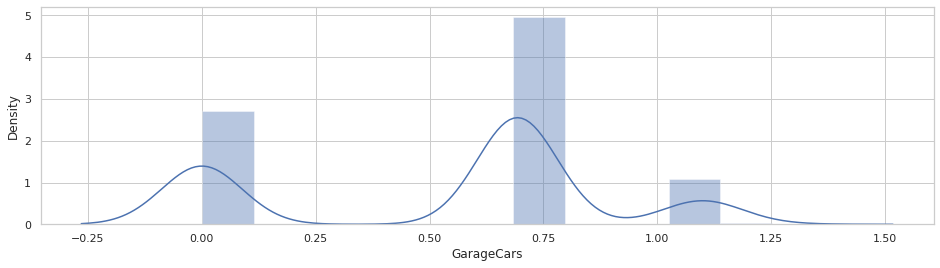

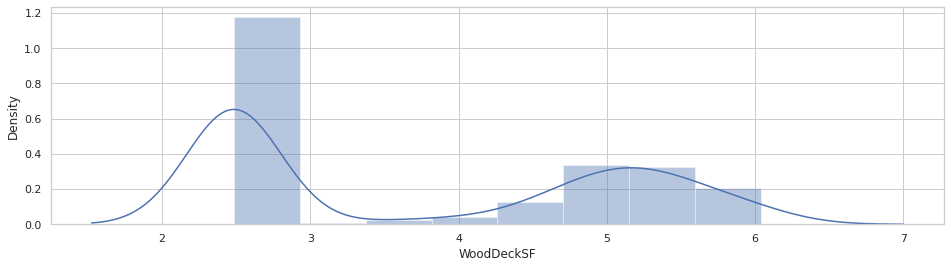

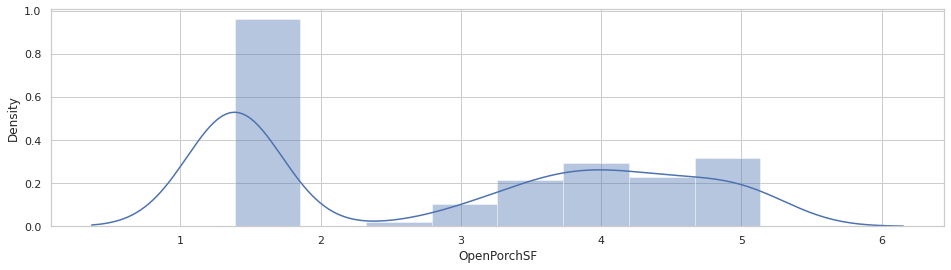

In [ ]:
for column in skewcols:
    plt.figure(figsize=(16, 4))
    sns.set_theme(style="whitegrid")
    print(column)
    sns.distplot(df[column])

In [137]:
df['SaleType'].fillna(value=6.,inplace=True)

In [138]:
df.shape

(1459, 69)

In [139]:
df.to_csv('house_test_proper.csv')